In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Data Cleaning**

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since Age is an important variable we will fill the missing values with mean values of the column. The cabin column has a lot of missing values in the dataset hence it would be better to remove the column from further analysis after we have answered relevant questions. The Embarked column as only 2 values missing hence we can fill with the mode of the column.

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
df[df.duplicated(keep='first')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [10]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

Since Age is in float and have values that are in decimals eg - 0.92 , 0.75 etc that doesnt make sense, hence we will remove them.

In [11]:
# Filter all rows for which the player's
# age is greater than or equal to 1
df.drop(df[df['Age'] < 1].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)

In [12]:
df['Age'] = df['Age'].astype(int)

In [13]:
df.drop(columns=['PassengerId', 'Name'],inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  884 non-null    int64  
 1   Pclass    884 non-null    int64  
 2   Sex       884 non-null    object 
 3   Age       884 non-null    int64  
 4   SibSp     884 non-null    int64  
 5   Parch     884 non-null    int64  
 6   Ticket    884 non-null    object 
 7   Fare      884 non-null    float64
 8   Cabin     203 non-null    object 
 9   Embarked  884 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 108.3+ KB


**Dataset Description**

1. survival - Survival 
2. pclass - Ticket class
3. sex - Sex	
4. Age	- Age in years	
5. sibsp	- #of siblings / spouses aboard the Titanic	
6. parch	- #of parents / children aboard the Titanic	
7. ticket - Ticket number	
8. fare - Passenger fare	
9. cabin -	Cabin number	
10. embarked -	Port of Embarkation

**Questions that can be asked -** 
1. Categories of passengers (age group,gender,couples, no of children)
2. ticket Pclass and fare comparison
3. What deck were people on and its relation to survival
4. Most popular port of embarkation
5. Survival categorized stats based on Age, gender, etc
6. Factors of survival


## **Data Analysis**

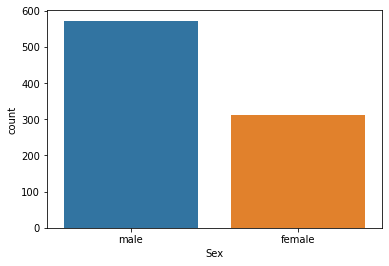

In [15]:
# to show number of males and female
sb.countplot(x ='Sex', data = df)
plt.show()

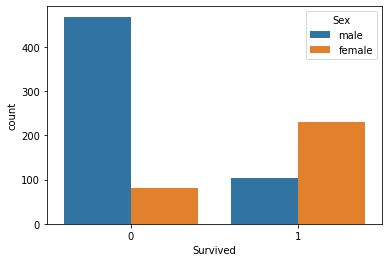

In [16]:
# to show number of males and female survived
sb.countplot(x ='Survived', data = df,hue='Sex')
plt.show()

In [17]:
df['Pclass'].value_counts()

3    488
1    215
2    181
Name: Pclass, dtype: int64

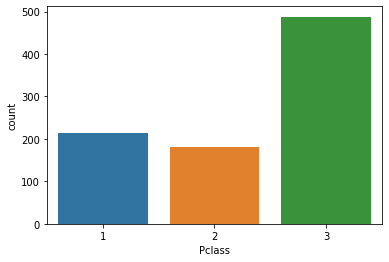

In [18]:
# to check most common ticket class
sb.countplot(x ='Pclass', data = df)
plt.show()

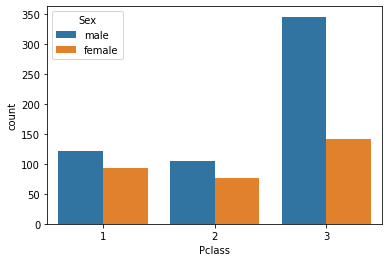

In [19]:
# no of males and females in respective ticket classes
sb.countplot(x ='Pclass', data = df, hue='Sex')
plt.show()

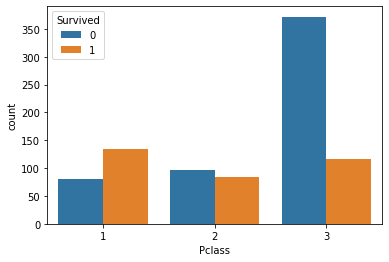

In [20]:
# no of people survived in respective ticket classes
sb.countplot(x ='Pclass', data = df, hue='Survived')
plt.show()

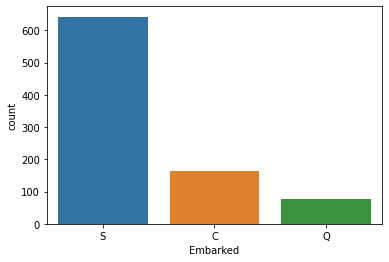

In [21]:
# most common port of embarkment 
sb.countplot(x ='Embarked', data = df)
plt.show()

In [22]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

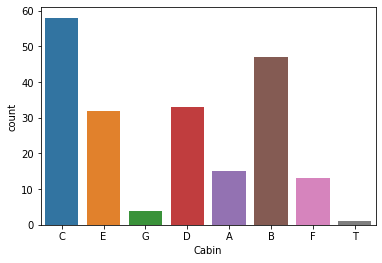

In [23]:
#to find most common cabin
deck = df['Cabin'].dropna()

#grab that letter for the deck level with a simple for loop
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use plot
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sb.countplot(x='Cabin',data=cabin_df)

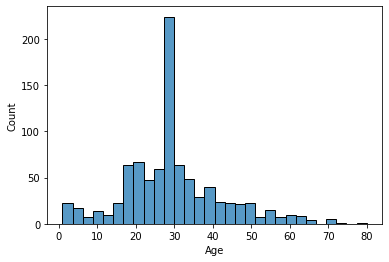

In [24]:
# to check the distribution of Age - as we can see average age is around 30 years
sb.histplot(x='Age',data=df)
plt.show()

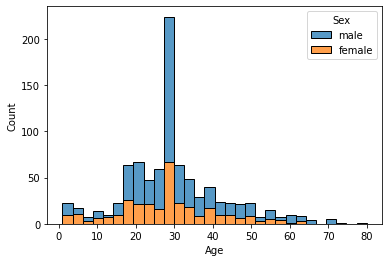

In [25]:
# to check for male and female age ratios
sb.histplot(x='Age',data=df,hue="Sex", multiple="stack")
plt.show()

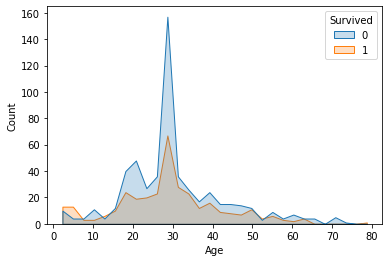

In [26]:
# to check for age and survival ratios
sb.histplot(x='Age',data=df,hue="Survived", element='poly')
plt.show()

In [27]:
df['SibSp'].value_counts()

0    606
1    206
2     26
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
df['Parch'].value_counts()

0    678
1    113
2     78
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

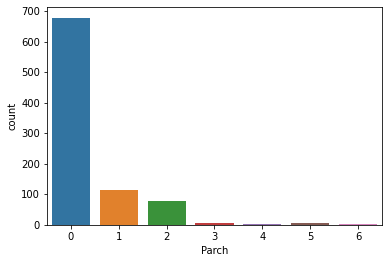

In [29]:
# to check the most common no of parents/children aboard
sb.countplot(x='Parch',data=df)
plt.show()

In [30]:
#to find no of children
df_ch = df[df['Age'] <= 15]
df_ch.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,0,3,male,2,3,1,349909,21.0750,NaN,S
9,1,2,female,14,1,0,237736,30.0708,NaN,C
10,1,3,female,4,1,1,PP 9549,16.7000,G6,S
14,0,3,female,14,0,0,350406,7.8542,NaN,S
16,0,3,male,2,4,1,382652,29.1250,NaN,Q


In [31]:
df_ch.shape

(76, 10)

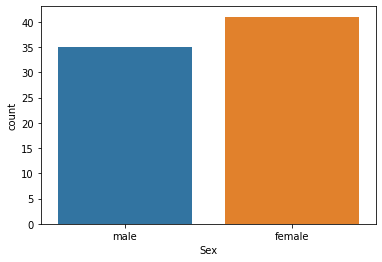

In [32]:
# to check the most genders of the children
sb.countplot(data=df_ch,x='Sex')
plt.show()

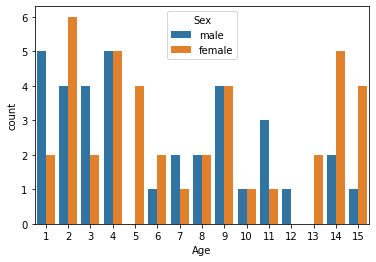

In [33]:
# to check the gender and age count 
sb.countplot(x='Age',data=df_ch,hue='Sex')
plt.show()

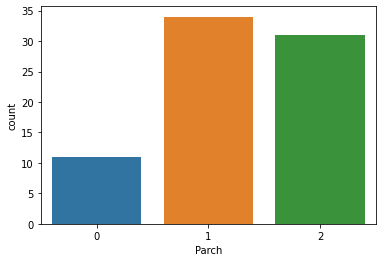

In [34]:
#to show the number of parents per child
sb.countplot(x='Parch',data=df_ch)
plt.show()

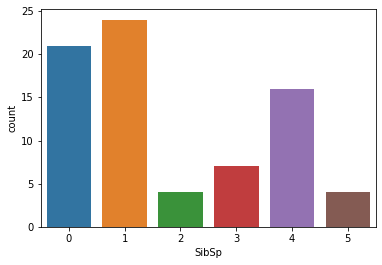

In [35]:
#to show number of siblings
sb.countplot(x='SibSp',data=df_ch)
plt.show()

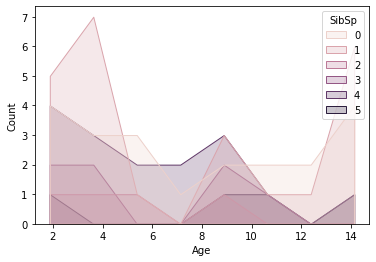

In [36]:
# to check age and no of siblings ratio graph
sb.histplot(x='Age',data=df_ch,hue='SibSp',element="poly")
plt.show()

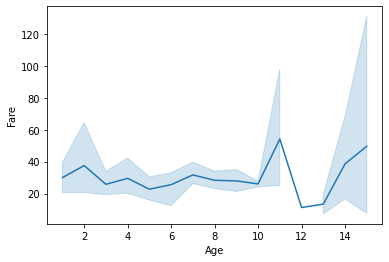

In [37]:
#to check the ticket price against age for children
sb.lineplot(y='Fare',x='Age',data=df_ch)
plt.show()

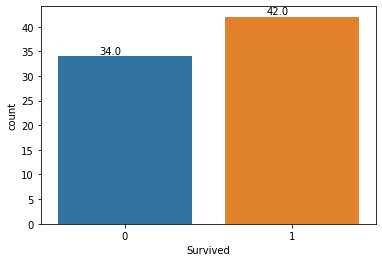

In [38]:
#to check the number of children survived
ax = sb.countplot(x='Survived',data=df_ch)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.5))
plt.show()

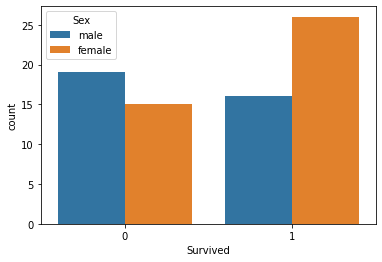

In [39]:
ax = sb.countplot(x='Survived',data=df_ch,hue='Sex')

In [40]:
#to find no of adults
df_ad = df[df['Age'] > 15]
df_ad.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35,1,0,113803,53.1000,C123,S
4,0,3,male,35,0,0,373450,8.0500,NaN,S


In [41]:
df_ad.shape

(808, 10)

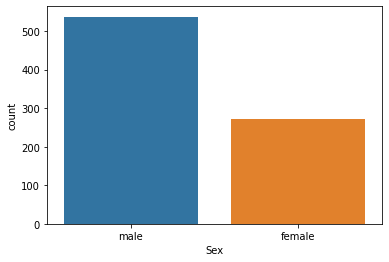

In [42]:
# to check the most genders of the adults
sb.countplot(data=df_ad,x='Sex')
plt.show()

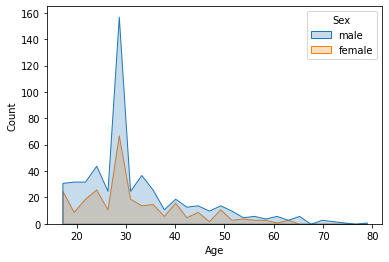

In [43]:
# to check age and gender ratio graph
sb.histplot(x='Age',data=df_ad,hue='Sex',element="poly")
plt.show()

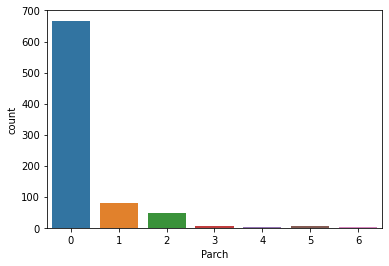

In [44]:
#to show the number of child per adult
sb.countplot(x='Parch',data=df_ad)
plt.show()

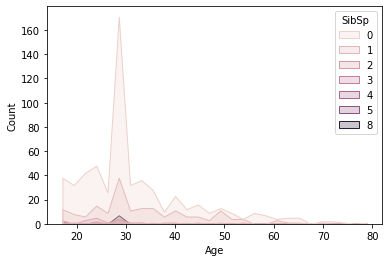

In [45]:
# to check age and no of siblings/spouses ratio graph
sb.histplot(x='Age',data=df_ad,hue='SibSp',element="poly")
plt.show()

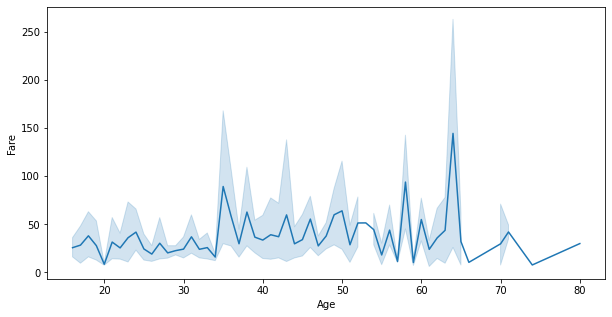

In [46]:
#to check the ticket price against age for adults
plt.figure(figsize=(10, 5))
sb.lineplot(y='Fare',x='Age',data=df_ad)
plt.show()

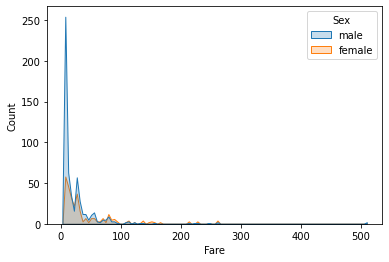

In [47]:
# to fare against gender graph
sb.histplot(x='Fare',data=df,hue='Sex',element="poly")
plt.show()

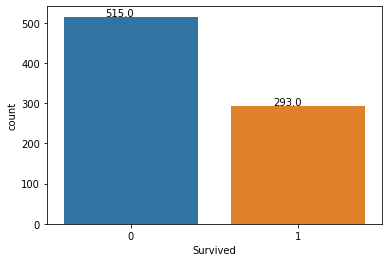

In [48]:
#to check the number of adults survived
ax = sb.countplot(x='Survived',data=df_ad)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+1.0))
plt.show()

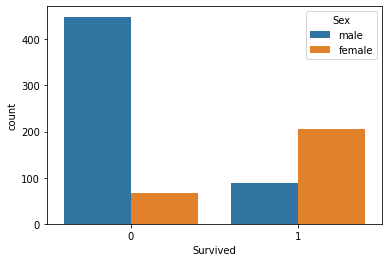

In [49]:
sb.countplot(x='Survived',data=df_ad,hue='Sex')
plt.show()

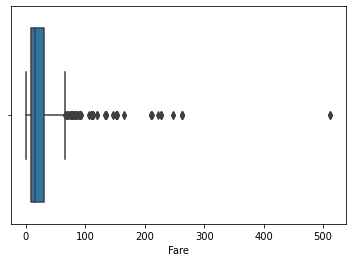

In [50]:
# to check the distribution of the Fare
sb.boxplot(x='Fare',data=df)
plt.show()

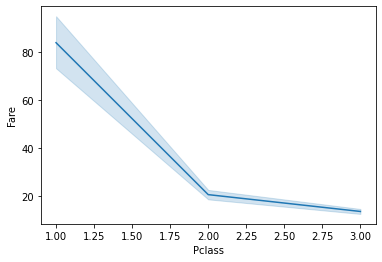

In [51]:
#to check the ticket price against ticket class
sb.lineplot(y='Fare',x='Pclass',data=df)
plt.show()

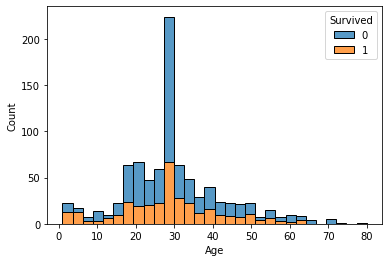

In [52]:
sb.histplot(x='Age',data=df,hue='Survived',multiple="stack")

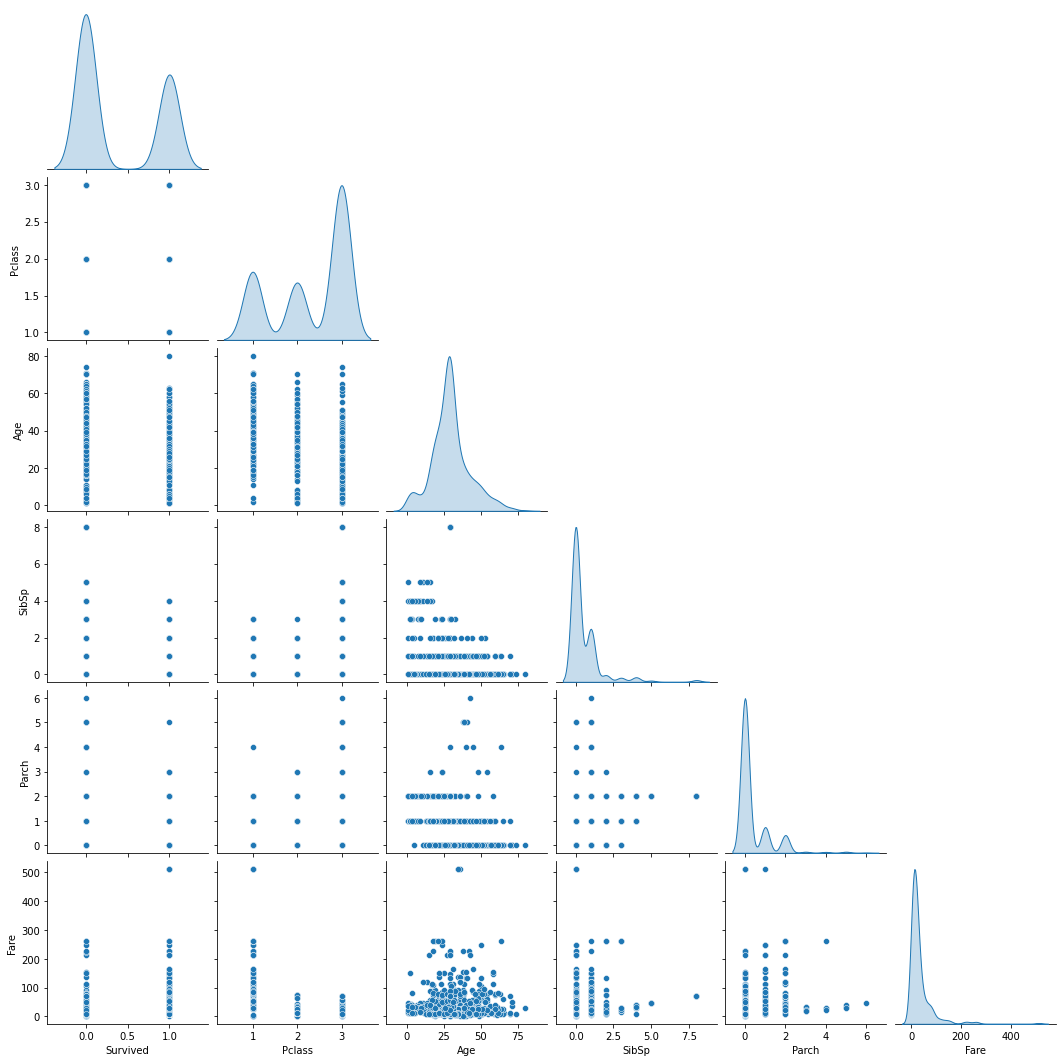

In [53]:
sb.pairplot(df, diag_kind="kde", corner=True)

Factors for survival

In [54]:
df_group_one = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex']]
df_group_one.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22,1,0,7.2500,male
1,1,1,38,1,0,71.2833,female
2,1,3,26,0,0,7.9250,female
3,1,1,35,1,0,53.1000,female
4,0,3,35,0,0,8.0500,male


In [55]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_group_one['Sex']= label_encoder.fit_transform(df_group_one['Sex'])
 
df_group_one.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0,3,22,1,0,7.2500,1
1,1,1,38,1,0,71.2833,0
2,1,3,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,0,3,35,0,0,8.0500,1


In [56]:
df_group_one.corr()['Survived'].sort_values(ascending=True)

Sex        -0.550227
Pclass     -0.341319
Age        -0.046264
SibSp      -0.040023
Parch       0.071266
Fare        0.258852
Survived    1.000000
Name: Survived, dtype: float64

As we can see that the data is very much on different scales especially for Age and Fare thus, it might not produce accurate results. Hence, we first normalize it using Min-Max standardization.

In [57]:
for column in df_group_one.columns:
    df_group_one[column] = (df_group_one[column] - df_group_one[column].min()) / (df_group_one[column].max() - df_group_one[column].min())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
df_group_one.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0.0,1.0,0.265823,0.125,0.0,0.014151,1.0
1,1.0,0.0,0.468354,0.125,0.0,0.139136,0.0
2,1.0,1.0,0.316456,0.000,0.0,0.015469,0.0
3,1.0,0.0,0.430380,0.125,0.0,0.103644,0.0
4,0.0,1.0,0.430380,0.000,0.0,0.015713,1.0


In [59]:
df_group_one.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
Survived,1.000000,-0.341319,-0.046264,-0.040023,0.071266,0.258852,-0.550227
Pclass,-0.341319,1.000000,-0.343586,0.082397,0.021500,-0.548099,0.136816
Age,-0.046264,-0.343586,1.000000,-0.230297,-0.160861,0.098054,0.087150
SibSp,-0.040023,0.082397,-0.230297,1.000000,0.415923,0.160267,-0.111535
Parch,0.071266,0.021500,-0.160861,0.415923,1.000000,0.214444,-0.250858
Fare,0.258852,-0.548099,0.098054,0.160267,0.214444,1.000000,-0.185475
Sex,-0.550227,0.136816,0.087150,-0.111535,-0.250858,-0.185475,1.000000


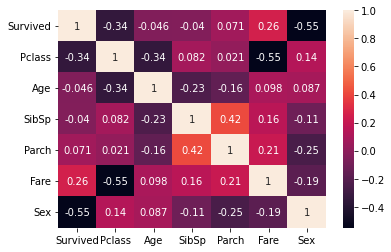

In [60]:
sb.heatmap(df_group_one.corr(), annot=True)

As we can see and form relationships between various variables present in the dataset. Survived variable is very weak positively correlated to ticket Fare, which is again negatively coorelated to Pclass. Survived attribute is also positively with Parch attribute but has no as such logical relation. Infact suprising it is negatively corelated with age.

---


From above charts and visualizations, some of the factors of survival are - 
1. Females and children were the most to survive as compared to male gender
2. People around 20-30 age group survived most among adults
3. Most of the people survived were from ticket class 1 and most died were from Ticket class 3

